 Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu113, 1.11.0+cu115, 1.12.0, 1.12.0+cpu, 1.12.0+cu113, 1.12.0+cu116, 1.12.1, 1.12.1+cpu, 1.12.1+cu113, 1.12.1+cu116, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 2.0.0, 2.0.0+cpu, 2.0.0+cu117, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cu117, 2.0.1+cu118, 2.1.0, 2.1.0+cpu, 2.1.0+cu118, 2.1.0+cu121, 2.1.1, 2.1.1+cpu, 2.1.1+cu118, 2.1.1+cu121, 2.1.2, 2.1.2+cpu, 2.1.2+cu118, 2.1.2+cu121, 2.2.0, 2.2.0+cpu, 2.2.0+cu118, 2.2.0+cu121, 2.2.1, 2.2.1+cpu, 2.2.1+cu118, 2.2.1+cu121, 2.2.2, 2.2.2+cpu, 2.2.2+cu118, 2.2.2+cu121, 2.3.0, 2.3.0+cpu, 2.3.0+cu118, 2.3.0+cu121, 2.3.1, 2.3.1+cpu, 2.3.1+cu118, 2.3.1+cu121, 2.4.0, 2.4.1, 2.5.0, 2.5.1)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for torch==1.8.1+cu111


In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

c:\Users\Vidhish Shetty\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instantiate Model

In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

c:\Users\Vidhish Shetty\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vidhish Shetty\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Encode and Calculate Sentiment

In [5]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [6]:
result = model(tokens)

In [7]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [8]:
int(torch.argmax(result.logits))+1

4

 Collect Reviews

In [9]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [10]:
reviews

["Very cute coffee shop and restaurant. They have a lovely outdoor seating area and several tables inside.  It was fairly busy on a Tuesday morning but we were to grab the last open table. The server was so enjoyable, she chatted and joked with us and provided fast service with our ordering, drinks and meals. The food was very good. We ordered a wide variety and every meal was good to delicious. The sweet potato fries on the Chicken Burger plate were absolutely delicious, some of the best I've ever had. I definitely enjoyed this cafe, the outdoor seating, the service and the food!!",
 "Six of us met here for breakfast before our walk to Manly. We were enjoying visiting with each other so much that I apologize for not taking any photos. We all enjoyed our food, as well as our coffee and tea drinks.We were greeted immediately by a friendly server asking if we would like to sit inside or out. We said we would like inside, but weren't exactly sure how many were joining us yet- at least 4. 

Load Reviews into DataFrame and Score

In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [13]:
df['review'].iloc[0]

"Very cute coffee shop and restaurant. They have a lovely outdoor seating area and several tables inside.  It was fairly busy on a Tuesday morning but we were to grab the last open table. The server was so enjoyable, she chatted and joked with us and provided fast service with our ordering, drinks and meals. The food was very good. We ordered a wide variety and every meal was good to delicious. The sweet potato fries on the Chicken Burger plate were absolutely delicious, some of the best I've ever had. I definitely enjoyed this cafe, the outdoor seating, the service and the food!!"

In [14]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [15]:
sentiment_score(df['review'].iloc[1])


4

In [16]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [25]:
df

,review,sentiment
0,Very cute coffee shop and restaurant. They hav...,4
1,Six of us met here for breakfast before our wa...,4
2,We came for brunch and they ran out of seven s...,2
3,The food was delicious. The ricotta pancakes w...,4
4,Great place with delicious food and friendly s...,5
5,Ricotta hot cakes! These were so yummy. I ate ...,5
6,Great food amazing coffee and tea. Short walk ...,5
7,"Great service, lovely location, and really ama...",5
8,We came for brunch twice in our week-long visi...,4
9,It was ok. Had coffee with my friends. I'm new...,3


In [18]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


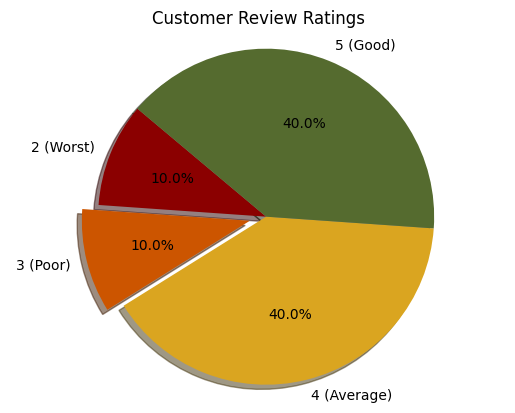

In [31]:
rating_counts = df['sentiment'].value_counts().sort_index()

labels = [f"{rating} ({desc})" for rating, desc in zip(rating_counts.index, ["Worst", "Poor", "Average", "Good", "Best"])]

colors = ['#8B0000', '#CC5500', '#DAA520', '#556B2F', '#006400']
plt.pie(rating_counts, labels=labels, autopct='%1.1f%%', startangle=140,explode=explode,shadow=True,colors=colors)
plt.title('Customer Review Ratings')
plt.axis('equal')  

plt.show()